# Logistic Regression of Credit Defaults
## MSDS 7349 - Section 401
## Lab 1

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

**Team:**
    * Jostein Barry-Straume
    * Kevin Cannon
    * Ernesto Carrera Ruvalcaba
    * Adam Tschannen

# Table of Contents
* [Team Members](#Team-Members)
* [Business Understanding](#Business-Understanding)
* [Data Meaning Type](#Data-Meaning-Type)
* [Data Quality](#Data-Quality)
* [Simple Statistics](#Simple-Statistics)
* [Visualize Attributes](#Visualize-Attributes)
* [Explore Joint Attributes](#Explore-Joint-Attributes)
* [Explore Attributes and Class](#Explore-Attributes-and-Class)
* [New Features](#New-Features)
* [Exceptional Work](#Exceptional-Work)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)
* [Kevin Cannon](https://github.com/kcannon2)
* [Ernesto Carrera Ruvalcaba](https://github.com/ecarrerasmu)
* [Adam Tschannen](https://github.com/adamtschannen)

# <a name="Business-Understanding"></a>Business Understanding
*Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.*

> The credit default data set is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). It has 30,000 records with 24 attributes. The records reflect the payment data from an important Taiwanese bank during October, 2005 (Yeh & Lien 2475).

> The purpose of the data set was to tackle the issue of forecasting the probability of default. In particular, the researchers of this data set sought to determine if the "estimated probability of default produced from data mining methods... (could) represent the "real" probability of default" (Yeh & Lien 2473).

> One way to define and measure the outcomes from the data set would be to perform a logistic regression. In doing so, one could predict if a customer would default on a credit payment in the next month.

> In order to measure the effectiveness of the prediction algorithm, the data set will be randomly split into a training and a test data sets. Consequently, we can then measure the accuracy of the prediction algorithm with real world data.

# <a name="Data-Meaning-Type"></a>Data Meaning Type
*Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.*

| Variable | Variable Type | Summary | Description |
| :------: | :-----------: | :-----: | :-----: |
| LIMIT_BAL | int64 | Test |
| SEX | int64 | int64 |
| EDUCATION | int64 | Test |
| MARRIAGE | int64 | Test |
| AGE | int64 | Test |
| PAY_0 | int64 | Test |
| PAY_2 | int64 | Test |
| PAY_3 | int64 | Test |
| PAY_4 | int64 | Test |
| PAY_5 | int64 | Test |
| PAY_6 | int64 | Test |
| BILL_ATM1 | int64 | Test |
| BILL_ATM2 | int64 | Test |
| BILL_ATM3 | int64 | Test |
| BILL_ATM4 | int64 | Test |
| BILL_ATM5 | int64 | Test |
| BILL_ATM6 | int64 | Test |
| PAY_ATM1 | int64 | Test |
| PAY_ATM2 | int64 | Test |
| PAY_ATM3 | int64 | Test |
| PAY_ATM4 | int64 | Test |
| PAY_ATM5 | int64 | Test |
| PAY_ATM6 | int64 | Test |
| default payment next month | int64 | Test |

'default_next_m' : Is a binary variable response variable with “Yes, they defaulted” = 1 and  “No, they did not default”  = 0 The other 23 variables, which are explained below, are the explanatory variables: 
'LIMIT_BAL' :Is the amount of the given credit in New Taiwan dollars. It includes both the individual consumer credit and his/her family (supplementary) credit. 
‘GENDER’: Defines each subjects gender with 1 = male and  2 = female.
‘EDUCATION’: Represents each subject level of education with:
1 = graduate school
2 = university
3 = high school
4 = others

Please note a classification of “0”,”5” and “6” were found while grouping the Education category. These undefined categories were grouped in with the “4” category “Other” because of the logic they are not defined as a graduate school, university or high school. This means they have education outside of those parameters so they will be in the “Other” category which also is outside of the first three categories.
‘MARRIAGE’: Defines the persons state of 1 = married, 2 = single and 3 = others. 
‘AGE’: defines how old each person is in years.

The below variables measure the repayment status in each month. 

x6'PAY_0' = the repayment status in September, 2005
x7'PAY_2' = the repayment status in August, 2005
x8  'PAY_3'= the repayment status in July, 2005
x9'PAY_4'= the repayment status in June, 2005
x10'PAY_5'= the repayment status in May, 2005
x11‘PAY_6’ = the repayment status in April, 2005

The scale for the PAY_ variables above is as follows:
-1 = pay duly
1 = payment delay for one month
2 = payment delay for two months
3 = payment delay for two months
4 = payment delay for two months
5 = payment delay for two months
6 = payment delay for two months
7 = payment delay for two months
8 = payment delay for eight months
9 = payment delay for nine months and above. 

*note there is no “0” classifier

The below variables represent the amount of how much each individual owes on their bill statement in New Taiwan dollars:
X12 'BILL_AMT1'= the repayment status in September, 2005
X13 'BILL_AMT2'= the repayment status in August, 2005
X14   ‘BILL_AMT3'= the repayment status in July, 2005
X15 'BILL_AMT4'= the repayment status in June, 2005
x16 'BILL_AMT5'= the repayment status in May, 2005
x17 ‘BILL_AMT6'= the repayment status in April, 2005

The below variables define the amount of previous payment New Taiwanese dollar: X18-X23: Amount of previous payment (NT dollar). 
X18 'PAY_AMT1' = the amount paid in September, 2005
X19 'PAY_AMT2' = the amount paid in August, 2005
X20 ‘'PAY_AMT3' = the amount paid in July, 2005
X21 'PAY_AMT4' = the amount paid in June, 2005
X22 'PAY_AMT5' = the amount paid in May, 2005
X23 ‘'PAY_AMT6' = the amount paid in April, 2005


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statistics as st
import csv as csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

filepath = "/Users/Jostein/Grad School/SMU/7331/project1/credit-default/data/default of credit card clients.xls"
credit = pd.read_excel(filepath, header=1, skiprows=0)

# Rename column(s)
credit = credit.rename(columns={'default payment next month': 'default_next_m'})
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next_m'],
      dtype='object')

# <a name="Data-Quality"></a>Data Quality
*Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.*

# <a name="Simple-Statistics"></a>Simple Statistics
*Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.*

# <a name="Visualize-Attributes"></a>Visualize Attributes
*Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate*

# <a name="Explore-Joint-Attributes"></a>Explore Joint Attributes
*Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*

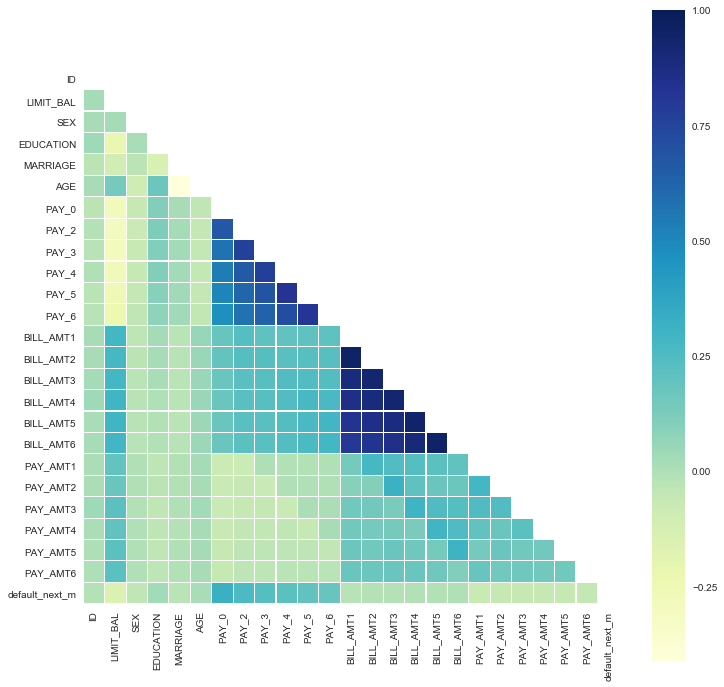

In [26]:
# Correlation heat map matrix
# Source:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap
corr = credit.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(12, 12))
    credit_heatmap_corr = sns.heatmap(corr, mask=mask, square=True,
                                    linewidths=.1, cmap="YlGnBu")
    plt.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/corr_heatmap')

> Blurb explaining above correlation matrix here

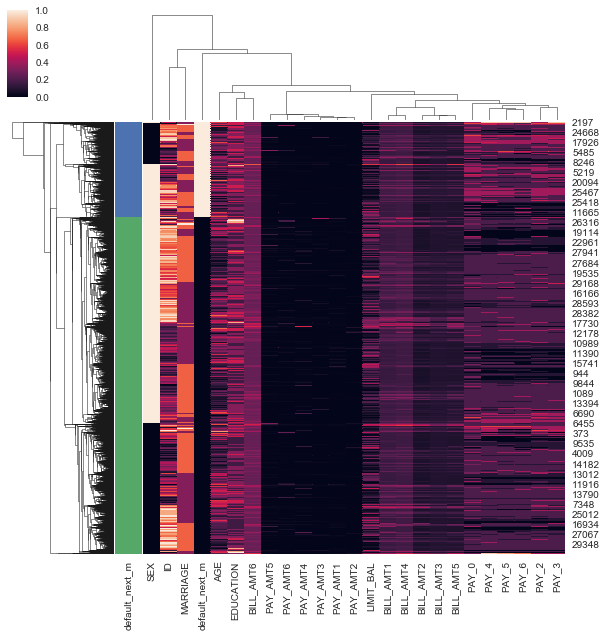

In [27]:
# Cluster Heat Map
# Source:
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
plt.figure()
sns.set(color_codes=True)
y_defaults = credit.default_next_m
lut = dict(zip(y_defaults.unique(), "bg"))
row_colors = y_defaults.map(lut)
g = sns.clustermap(credit, row_colors=row_colors, standard_scale=1)
g.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/cluster_heatmap')

> Blurb explaining above correlation matrix here

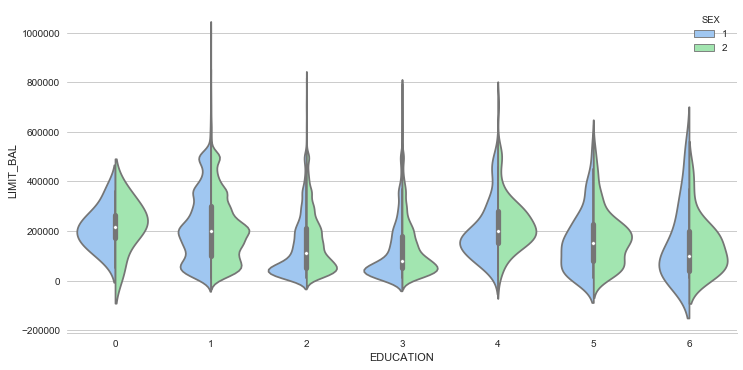

In [28]:
# Violin plot of limit balance distribution by education level per sex
# Source:
# http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="EDUCATION", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)
plt.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/violin-limitbalance-by-education-per-sex')


> Blurb explaining above violin plot here

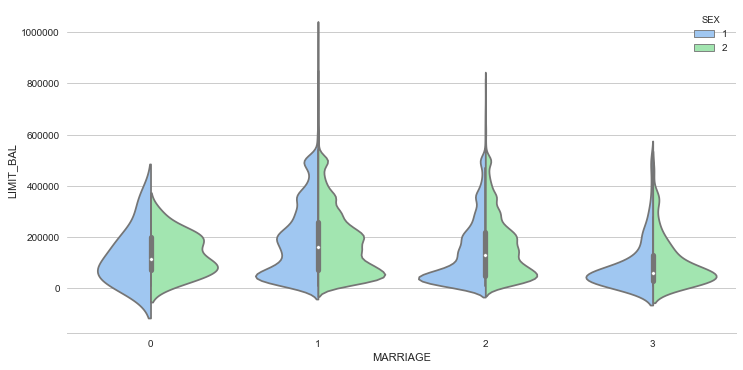

In [11]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
ax = sns.violinplot(x="MARRIAGE", y="LIMIT_BAL", hue="SEX", data=credit, split=True)
sns.despine(left=True)
plt.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/violin-limitbalance-by-marriage-per-sex')

> Blurb explaining above violin plot here

# <a name="Explore-Attributes-and-Class"></a>Explore Attributes and Class
*Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*

# <a name="New-Features"></a>New Features
*Are there other features that could be added to the data or created from existing features? Which ones?*

> Calculate limit balance

# <a name="Exceptional-Work"></a>Exceptional Work
*You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

> Along with spending easily 20 hours on this project, believe there is plethora of little things that add up to a create a polished professional project. In particular, Markdown formatting was utilized to a moderately advanced degree to create a clean and smooth structure flow to the project.

> The Table of Contents section links to each subsection of the project within this Jupyter notebook. Additionally, hyperlinks were incorporated via Markdown to link to each team members GitHub profile page. Moreover, table formatting within Markdown lends to a clear presentation format for describing the meaning and type of data for each attribute in the data file.

In [3]:
# Build the logistic regression
# Source:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/

# Find total number of columns
len(credit.columns)

# Set X variables for the model
# Slices all attributes except for 'default_next_m' into X
X = credit[credit.columns[:24]]

# Set Y variable for the model
Y = credit['default_next_m']

# Recursive Feature Selection for the top 10 performing variables
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)

print(fit)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)
Number of Features: 10
Selected Features: [False False  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False]
Feature Ranking: [ 4 12  1  1  1  1  1  1  1  1  1  1  5  6 13 11 15 10  2  3  9  7  8 14]


# <a name="References"></a>References
* Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
* https://pandas.pydata.org/pandas-docs/stable/api.html